In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [26]:
# Import data set
df = pd.read_csv('StudentsPerformance.csv')

# Data Overview

In [27]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [28]:
print(f'Shape of data set:\n\n {df.shape} \n')
print('----'*10)
print(f'Values: \n\n {df.values} \n')
print('----'*10)
print(f'Columns: \n\n{df.columns}\n')
print('----'*10)
print('Short data analyse: \n')
df.describe()

Shape of data set:

 (1000, 8) 

----------------------------------------
Values: 

 [['female' 'group B' "bachelor's degree" ... 72 72 74]
 ['female' 'group C' 'some college' ... 69 90 88]
 ['female' 'group B' "master's degree" ... 90 95 93]
 ...
 ['female' 'group C' 'high school' ... 59 71 65]
 ['female' 'group D' 'some college' ... 68 78 77]
 ['female' 'group D' 'some college' ... 77 86 86]] 

----------------------------------------
Columns: 

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

----------------------------------------
Short data analyse: 



,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [30]:
# function to identify missing value from all features
def missing_values (dataset):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False))
    missing_values= pd.concat([total,percent], axis=1, keys= ['Total', 'Percent'])
    return missing_values
print('Missing Values from Students Performance data set')
print()
print (missing_values (df))

Missing Values from Students Performance data set

                             Total  Percent
writing score                    0      0.0
reading score                    0      0.0
math score                       0      0.0
test preparation course          0      0.0
lunch                            0      0.0
parental level of education      0      0.0
race/ethnicity                   0      0.0
gender                           0      0.0


In [31]:
#create funcion to identify all numeric data
def numeric(data):
    numeric_cols = data.select_dtypes(np.number).columns.tolist()
    return data[numeric_cols].head(3)
print('Numeric features of data set are:')
print()
numeric_df= numeric(df)
print(numeric_df)

Numeric features of data set are:

   math score  reading score  writing score
0          72             72             74
1          69             90             88
2          90             95             93


In [32]:
#create funcion to identify all categorical data
def categoric(data):
    categoric_cols = data.select_dtypes(exclude=np.number).columns.tolist()
    return data[categoric_cols].head(3)
print('Categoric features of data set are:')
print()
categoric_df= categoric(df)
print(categoric_df)

Categoric features of data set are:

   gender race/ethnicity parental level of education     lunch  \
0  female        group B           bachelor's degree  standard   
1  female        group C                some college  standard   
2  female        group B             master's degree  standard   

  test preparation course  
0                    none  
1               completed  
2                    none  


In [33]:
df_num= df.drop(categoric_df, axis = 1)
df_num.head(3)

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93


# Exploratory Data Analysis

(3.5, -0.5)

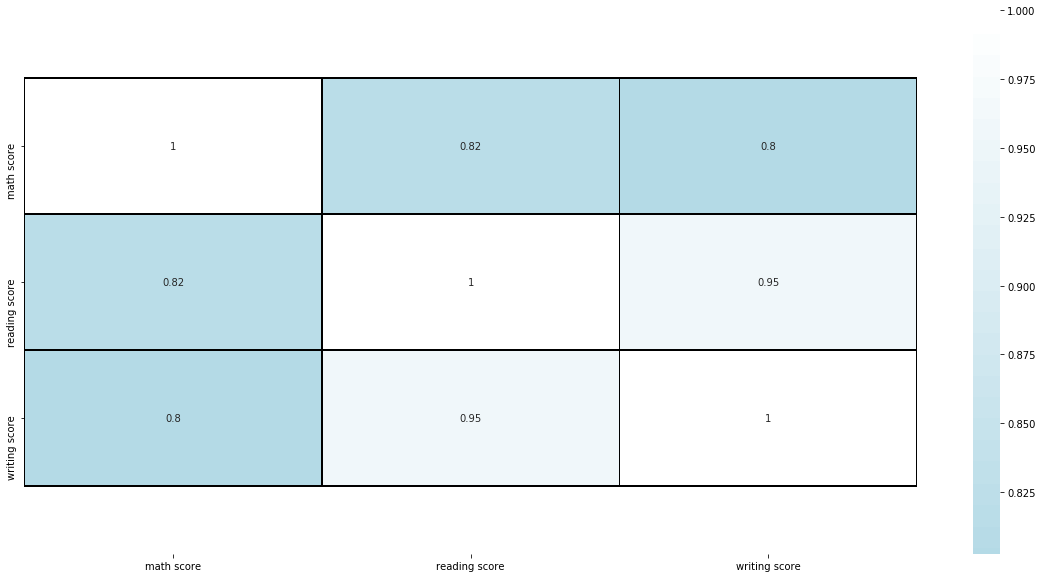

In [34]:
# correlation 
plt.figure(figsize=(20,10))
ax = sns.heatmap(df.corr(), annot=True, cmap='ocean',annot_kws={'size': 10},
                linecolor='black', center=False,  linewidths=.5)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5) 

In [35]:
num_cols= [col_name for col_name in df_num]
len(num_cols)

3

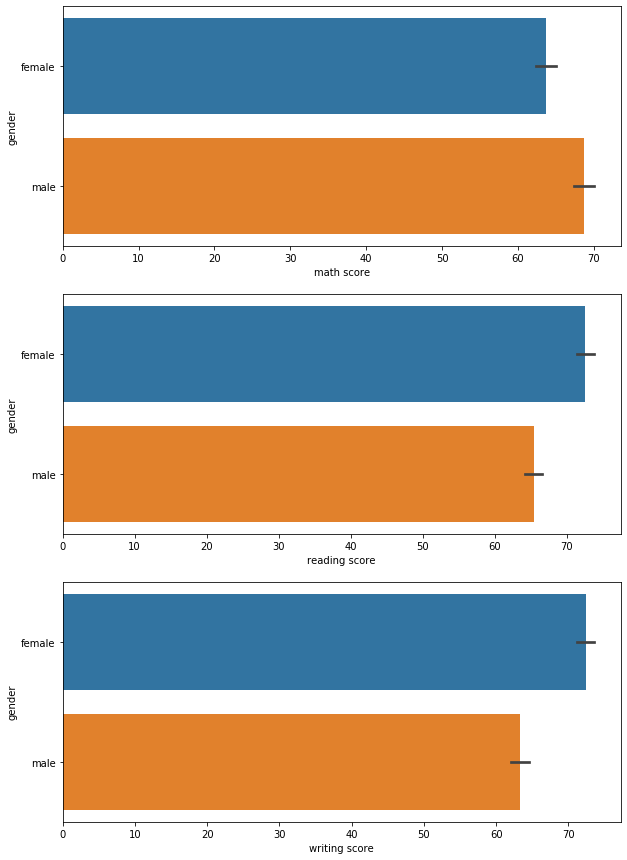

In [36]:
# Let see some visualisation of features

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))
start = 0
for j in range(3):
    for i in range(1):
        if start == len(num_cols):
            break
        sns.barplot(x=num_cols[start],
                    y='gender', data=df, ax=ax[j])
        start += 1

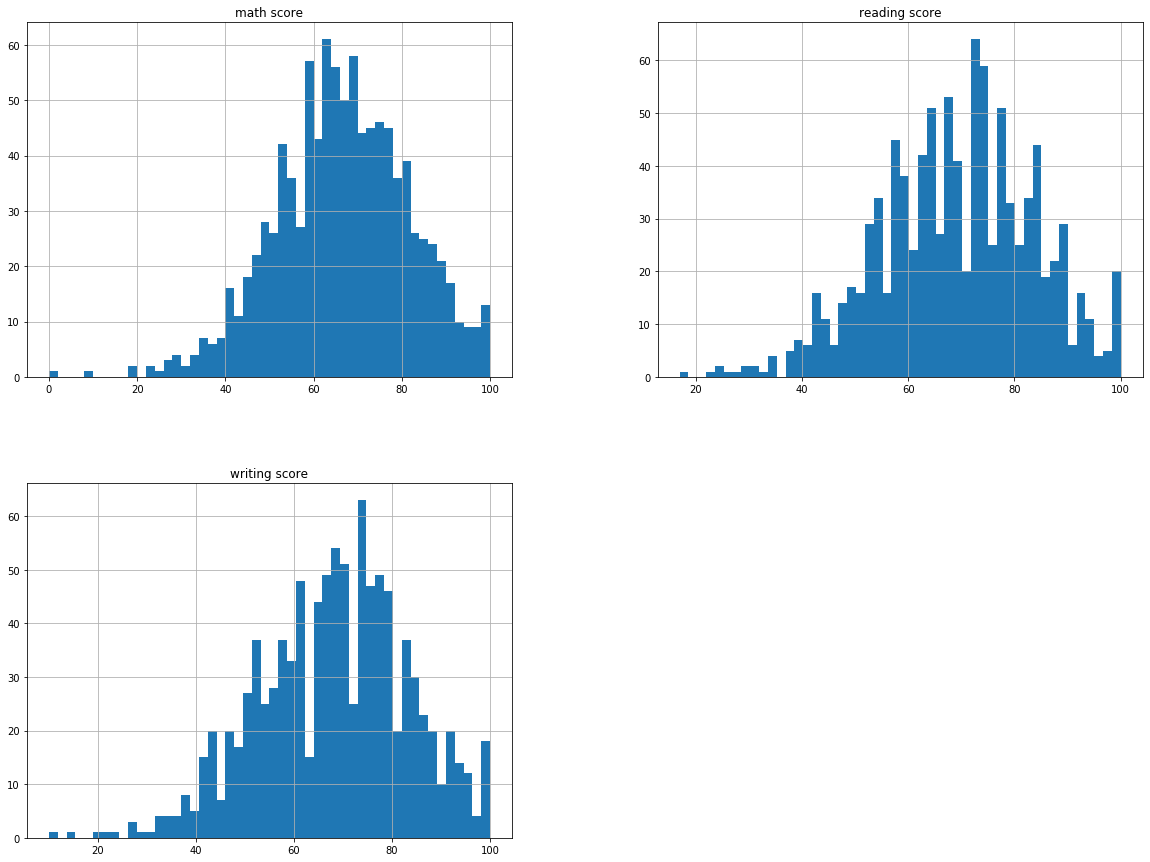

In [37]:
# Let's plot some histograms to have a previzualisation of some of the data
df.hist(bins=50, figsize=(20,15))
plt.show()

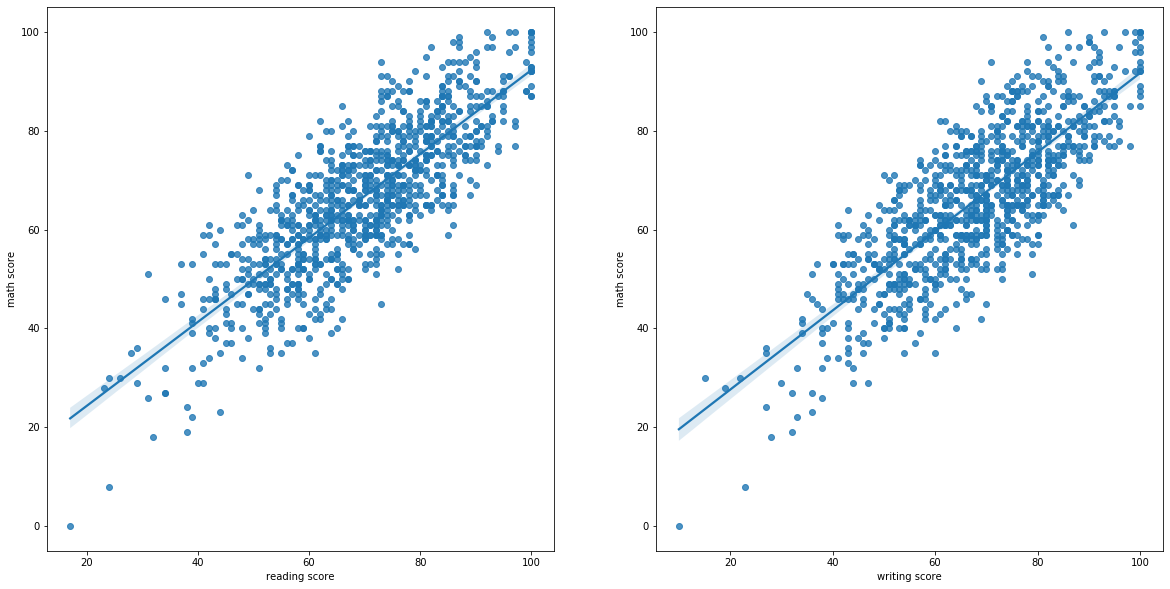

In [38]:
plain_features = ['reading score', 'writing score']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
start = 0
for j in range(1):
    for i in range(2):
        if start == len(plain_features):
            break
        sns.regplot(x=plain_features[start],
                    y='math score', data=df, ax=ax[i])
        start += 1

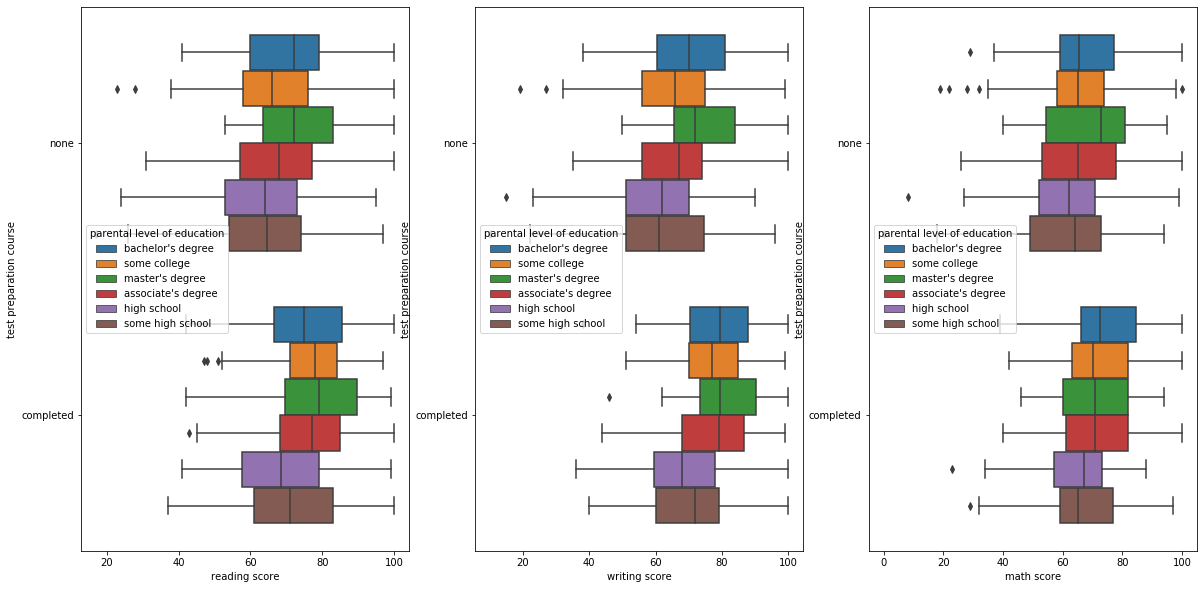

In [39]:
plain_features = ['reading score', 'writing score', 'math score']
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
start = 0
for j in range(1):
    for i in range(3):
        if start == len(plain_features):
            break
        sns.boxplot(x=plain_features[start],
                    y='test preparation course', data=df, hue='parental level of education', ax=ax[i])
        start += 1

# PREPROCESING

In [40]:
from sklearn.preprocessing import LabelEncoder
df2 = df.copy()
lab_enc = LabelEncoder()
display(df.head(3))
df2['gender_lab'] = lab_enc.fit_transform(df2['gender'].values)
df2['tpc_lab'] = lab_enc.fit_transform(df2['test preparation course'].values)
print()
print('After transforming gender and test preparation course \n')
df2.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93



After transforming gender and test preparation course 



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_lab,tpc_lab
0,female,group B,bachelor's degree,standard,none,72,72,74,0,1
1,female,group C,some college,standard,completed,69,90,88,0,0
2,female,group B,master's degree,standard,none,90,95,93,0,1


In [41]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe.fit(df2.loc[:,['race/ethnicity']])
df_enc = pd.DataFrame(ohe.transform(df2.loc[:, ['race/ethnicity']]).toarray(), columns=ohe.get_feature_names())
df_enc.head(5)

,x0_group A,x0_group B,x0_group C,x0_group D,x0_group E
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0


In [42]:
ohe.fit(df2.loc[:, ['parental level of education']])
df_enc1 = pd.DataFrame(ohe.transform(df2.loc[:, ['parental level of education']]).toarray(), columns=ohe.get_feature_names())
df_enc1.head(5)

,x0_associate's degree,x0_bachelor's degree,x0_high school,x0_master's degree,x0_some college,x0_some high school
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:
df_transform = pd.concat([df2, df_enc, df_enc1], axis=1)
df_transform.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_lab,tpc_lab,...,x0_group B,x0_group C,x0_group D,x0_group E,x0_associate's degree,x0_bachelor's degree,x0_high school,x0_master's degree,x0_some college,x0_some high school
0,female,group B,bachelor's degree,standard,none,72,72,74,0,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,female,group C,some college,standard,completed,69,90,88,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,female,group B,master's degree,standard,none,90,95,93,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,male,group C,some college,standard,none,76,78,75,1,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
df_transform.shape

(1000, 21)

In [44]:
df_ml=df_transform.drop(['lunch', 'parental level of education', 'test preparation course', 'race/ethnicity', 'gender'], axis=1)

In [45]:
X = df_ml.drop(['gender_lab'], axis = 1)
y = df_ml['gender_lab']
display(X.head(5))
display(y)

,math score,reading score,writing score,tpc_lab,x0_group A,x0_group B,x0_group C,x0_group D,x0_group E,x0_associate's degree,x0_bachelor's degree,x0_high school,x0_master's degree,x0_some college,x0_some high school
0,72,72,74,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,69,90,88,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,90,95,93,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,47,57,44,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,76,78,75,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


0      0
1      0
2      0
3      1
4      1
      ..
995    0
996    1
997    0
998    0
999    0
Name: gender_lab, Length: 1000, dtype: int32

In [46]:
# Split independent and target variable on train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=0)

In [47]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (800, 15)
y_train shape: (800,)
X_test shape: (200, 15)
y_test shape: (200,)


In [48]:
# First we will try to normalize data and than we will observe the distribution of data
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler()

# transform training data
X_train_norm = norm.fit_transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [49]:
# transform testing dataabs
X_test_norm = norm.transform(X_test)
col_names = list(X.columns)
df_norm = pd.DataFrame(data = X_train_norm, columns = col_names)
df_norm.head(3)

,math score,reading score,writing score,tpc_lab,x0_group A,x0_group B,x0_group C,x0_group D,x0_group E,x0_associate's degree,x0_bachelor's degree,x0_high school,x0_master's degree,x0_some college,x0_some high school
0,0.77,0.734940,0.700000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.74,0.746988,0.800000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.62,0.469880,0.477778,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


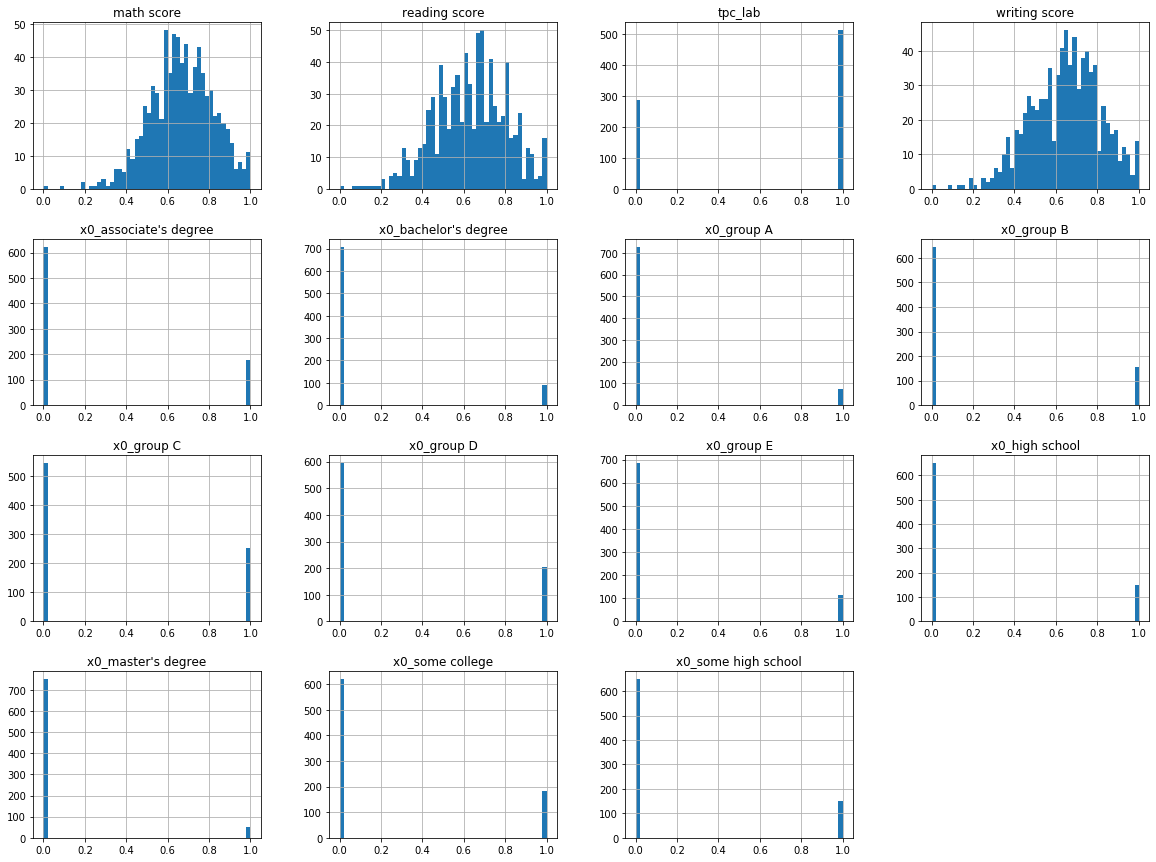

In [50]:
# Visualize normalized data
df_norm.hist(bins=50, figsize=(20,15))
plt.show()

In [51]:
# Second we will try to standardize data and than we will observe the distribution of data
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
col_names = list(X.columns)
df_std = pd.DataFrame(data = X_train_std, columns = col_names)
df_std.head(3)

,math score,reading score,writing score,tpc_lab,x0_group A,x0_group B,x0_group C,x0_group D,x0_group E,x0_associate's degree,x0_bachelor's degree,x0_high school,x0_master's degree,x0_some college,x0_some high school
0,0.712719,0.591958,0.313452,0.750000,-0.314485,-0.488252,-0.682057,1.703655,-0.409736,1.876106,-0.358259,-0.478413,-0.258199,-0.540747,-0.484322
1,0.515085,0.660771,0.905803,0.750000,-0.314485,-0.488252,-0.682057,1.703655,-0.409736,-0.533019,-0.358259,-0.478413,3.872983,-0.540747,-0.484322
2,-0.275453,-0.921914,-1.002883,-1.333333,-0.314485,-0.488252,-0.682057,-0.586973,2.440599,1.876106,-0.358259,-0.478413,-0.258199,-0.540747,-0.484322


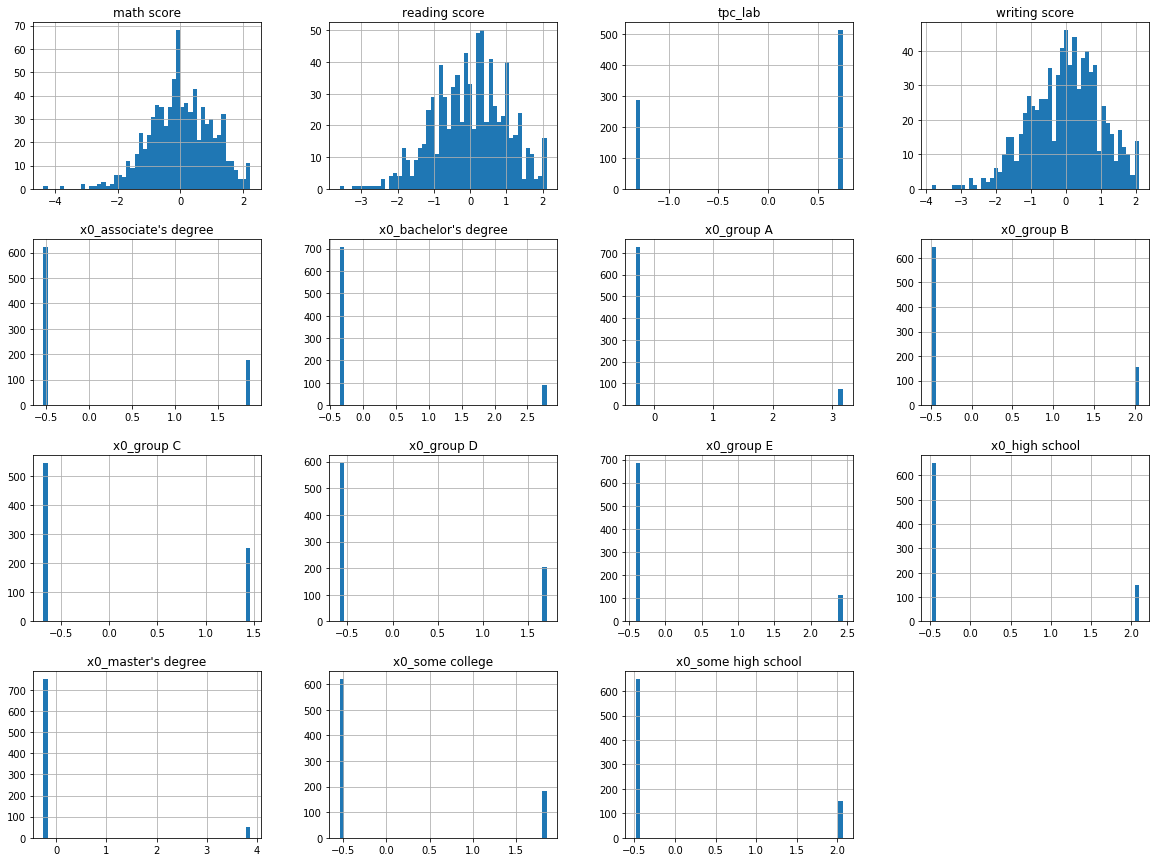

In [52]:
## Visualize standardized data
df_std.hist(bins=50, figsize=(20,15))
plt.show()

In [54]:
# Import scores 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [55]:
acc_scores = {}
ROC={}

In [56]:
# Define function to go through models
def models(model, X_train, y_train, X_test, y_test, model_name):
    reg = model
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    acc_scores[model_name] = accuracy_score(y_test, y_pred)
    print(f"Acc_score of {model_name}: {acc_scores[model_name]}\n")
    ROC[model_name]=roc_auc_score(y_test, y_pred)
    print(f"Roc_auc_score: {ROC[model_name]} \n ")
    return model

In [57]:
# First model Svc_linear
from sklearn.svm import SVC, NuSVC, LinearSVC
Svc_linear = SVC(kernel='linear', C=1)
model1 = models(Svc_linear, X_train_std, y_train, X_test_std, y_test, 'Svc_linear')

Acc_score of Svc_linear: 0.89

Roc_auc_score: 0.89008900890089 
 


In [58]:
# Second model SVC_rbf
SVC_rbf = SVC()
model2 = models(SVC_rbf, X_train_std, y_train, X_test_std, y_test, 'SVC_rbf')


Acc_score of SVC_rbf: 0.84

Roc_auc_score: 0.84008400840084 
 


In [59]:
# Third model RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model3 = models(rf, X_train_std, y_train, X_test_std, y_test, 'Ran_for_clf')


Acc_score of Ran_for_clf: 0.825

Roc_auc_score: 0.8254325432543255 
 


In [60]:
# Fourth model LogisticRegression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0)
model4 = models(log_reg, X_train_std, y_train, X_test_std, y_test, 'Log_Reg')


Acc_score of Log_Reg: 0.885

Roc_auc_score: 0.8852385238523851 
 


Text(0, 0.5, 'Testing Accuracy')

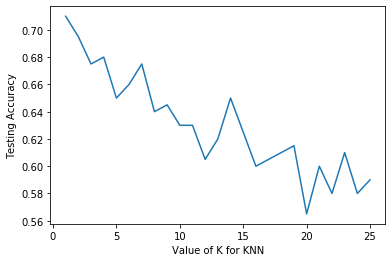

In [61]:
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import matplotlib.pyplot as plt

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_std,y_train)
        y_pred=knn.predict(X_test_std)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))


#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [62]:
#5th model KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=k)
model5 = models(KNN, X_train_std, y_train, X_test_std, y_test, 'KNN')


Acc_score of KNN: 0.59

Roc_auc_score: 0.5911591159115912 
 


In [63]:
# 6th XGBoost
import xgboost as xgb
xg_class = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
model6 = models(xg_class, X_train_std, y_train, X_test_std, y_test, 'xg')


Acc_score of xg: 0.825

Roc_auc_score: 0.8252325232523253 
 


In [64]:
# 7th model SGDClassifier
from sklearn.linear_model import SGDClassifier
sgdclass = SGDClassifier(max_iter=1000, tol=1e-3)
model7 = models(sgdclass, X_train_std, y_train, X_test_std, y_test, 'sgdclass')


Acc_score of sgdclass: 0.875

Roc_auc_score: 0.8752375237523752 
 


In [65]:
# 8th model DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
Dec_tree_class = DecisionTreeClassifier(random_state=0)
model8 = models(Dec_tree_class, X_train_std, y_train, X_test_std, y_test, 'Dec_tree_class')


Acc_score of Dec_tree_class: 0.865

Roc_auc_score: 0.865136513651365 
 


In [66]:
# 9th model ExtraTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier
extra_tree = ExtraTreeClassifier(random_state=0)
bag_class_extra_tree = BaggingClassifier(extra_tree, random_state=0)
model9 = models(bag_class_extra_tree, X_train_std, y_train, X_test_std, y_test, 'bag_class_extra_tree')


Acc_score of bag_class_extra_tree: 0.745

Roc_auc_score: 0.7455245524552455 
 


In [67]:
# 10th model AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
Ada =AdaBoostClassifier()
model10 = models(Ada, X_train_std, y_train, X_test_std, y_test, 'Ada')


Acc_score of Ada: 0.85

Roc_auc_score: 0.8505850585058506 
 


In [68]:
# Lets see the results of models
df_results = pd.DataFrame({'Models': list(acc_scores.keys()),
                          'Acc_Scores': list(acc_scores.values())})
df_results

,Models,Acc_Scores
0,Svc_linear,0.890
1,SVC_rbf,0.840
2,Ran_for_clf,0.825
3,Log_Reg,0.885
4,KNN,0.590
5,xg,0.825
6,sgdclass,0.875
7,Dec_tree_class,0.865
8,bag_class_extra_tree,0.745
9,Ada,0.850


[Text(0, 0.5, 'Acc_Scores')]

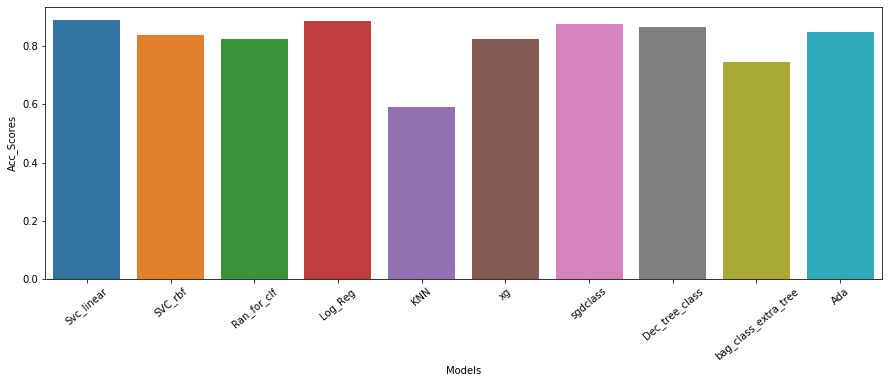

In [69]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x = "Models", y = "Acc_Scores", data = df_results)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
ax.set(ylabel = "Acc_Scores")

In [70]:
# Let see which model gives the best result
print(f"The model with best Acc_score is {max(acc_scores, key=acc_scores.get)} and it's Acc_score is {acc_scores[max(acc_scores, key=acc_scores.get)]:.3f}.")

The model with best Acc_score is Svc_linear and it's Acc_score is 0.890.


In [71]:
# Lets plot the results ROC score of models
df_results2 = pd.DataFrame({'Models': list(ROC.keys()),
                          'ROC_scores': list(ROC.values())})
df_results2

,Models,ROC_scores
0,Svc_linear,0.890089
1,SVC_rbf,0.840084
2,Ran_for_clf,0.825433
3,Log_Reg,0.885239
4,KNN,0.591159
5,xg,0.825233
6,sgdclass,0.875238
7,Dec_tree_class,0.865137
8,bag_class_extra_tree,0.745525
9,Ada,0.850585


[Text(0, 0.5, 'ROC_scores')]

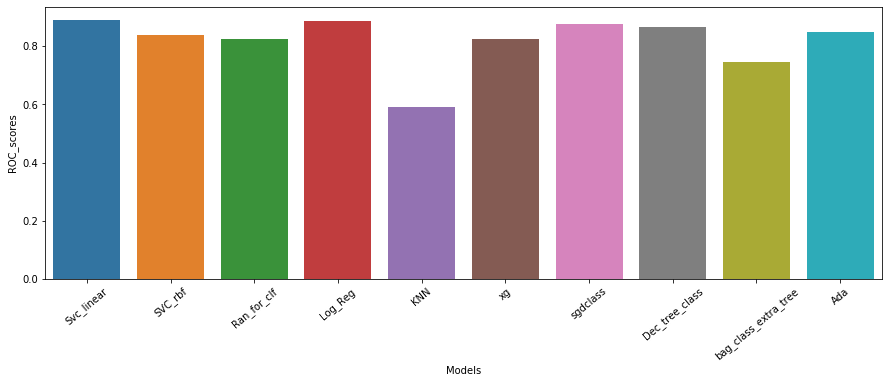

In [72]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x = "Models", y = "ROC_scores", data = df_results2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
ax.set(ylabel = "ROC_scores")

In [74]:
# Let see which model gives the best ROC score
print(f"The model with best roc is {max(ROC, key=ROC.get)} and it'roc is {ROC[max(ROC, key=ROC.get)]:.3f}.")

The model with best roc is Svc_linear and it'roc is 0.890.


In [75]:
# At the end let see how good is our prediction
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check.head(5)

,Actual,Predicted
993,0,0
859,1,0
298,1,1
553,1,0
672,0,0


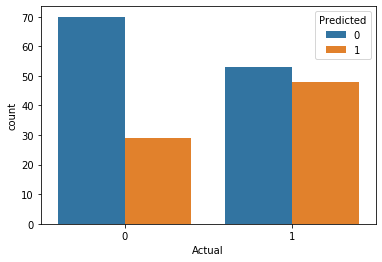

In [76]:
plot = sns.countplot(x = "Actual", hue='Predicted',data = df_check)

# THE END